In [1]:
# Rap Music Analysis
# 8/15/24



In [2]:
import csv
import matplotlib.pyplot as plt

from math import radians, cos, sin, asin, sqrt
import requests
import json
import os
import pandas as pd
from pandas import DataFrame, Series

import numpy as np


In [3]:


music_file = open('rap_1993-2019.csv', encoding='utf-8')
file_reader = csv.reader(music_file)
music_data = list(file_reader)
music_file.close()
header = music_data[0]
music_data = music_data[1:]

# convert str to float/int types in columns having numerical values.
for row in music_data:
    for idx in [4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23]:
        # Fill empty cell with 0 values.
        if row[idx] == '':
            row[idx] = 0
        if idx in [4, 7, 9, 15, 16, 17]:
            row[idx] = int(row[idx])
        elif idx in [5, 6, 8, 10, 11, 12, 13, 14, 18, 19, 20, 21, 22, 23]:
            row[idx] = float(row[idx])
            
            
# Some of the records are erroneous, and I want to exclude them if they may mess up my analysis.

# 1. Records that have "Prop Unique Words" as 1.0. No song has all unique words. Remove them from music_data.

# Identify the index of the "Prop Unique Words" column
prop_unique_words_index = header.index("Prop Unique Words")

# Filter out records with "Prop Unique Words" equal to 1.0
music_data = [row for row in music_data if row[prop_unique_words_index] != 1.0]
            
    
    
    
header

music_data

[['Souls Of Mischief',
  "93 'til Infinity",
  "93 'Til Infinity",
  '0PV1TFUMTBrDETzW6KQulB',
  68,
  0.59,
  0.672,
  1,
  -11.792,
  1,
  0.41200000000000003,
  1.04e-06,
  0.147,
  0.688,
  206.247,
  286440,
  4,
  1993,
  617.0,
  0.5623987034035657,
  0.026231147540983605,
  0.22950819672131148,
  0.6147540983606558,
  0.1557377049180328],
 ['A Tribe Called Quest',
  'Midnight Marauders',
  'Electric Relaxation',
  '32WDVNZXIAuu7EqncTTKjH',
  52,
  0.852,
  0.418,
  11,
  -12.823,
  1,
  0.42,
  0.35,
  0.126,
  0.6509999999999999,
  98.23700000000001,
  243800,
  4,
  1993,
  474.0,
  0.4282700421940928,
  0.2753255813953489,
  0.5348837209302325,
  0.32558139534883723,
  0.13953488372093023],
 ['Black Moon',
  'Enta Da Stage',
  'Buck Em Down',
  '59WUs7XrUI47VZZ5NxZWCs',
  39,
  0.6970000000000001,
  0.636,
  2,
  -12.447000000000001,
  1,
  0.0971,
  0.0,
  0.157,
  0.473,
  96.962,
  279107,
  4,
  1993,
  429.0,
  0.5384615384615384,
  -0.1621035714285714,
  0.119047619047

In [4]:
# Helper Functions


def cell(row_idx, col_name):
    col_idx = header.index(col_name)
    val = music_data[row_idx][col_idx]
    if val == "":
        return None
    return val


In [5]:
#Q1: Which track has the highest popularity?


def highest_track(column_name):

    highest_value = 0
    tracks_highest_value = []

    for row in range(len(music_data)):
        if cell(row, column_name) > highest_value:
            highest_value = cell(row, column_name)
            tracks_highest_value.clear()
            tracks_highest_value.append(
                [f"{column_name} is: {highest_value}", 
                cell(row, "artist"),
                cell(row, "album"),
                cell(row, "track_name")]
            )
        elif cell(row, column_name) == highest_value:
            tracks_highest_value.append(
                [f"{column_name} is: {highest_value}", 
                cell(row, "artist"),
                cell(row, "album"),
                cell(row, "track_name")]
            )
        else:
            continue
            
    return tracks_highest_value


highest_track("popularity")
    

[['popularity is: 89', 'Post Malone', "Hollywood's Bleeding", 'Circles']]

In [37]:
#Q2: Which track is the longest?


highest_track("duration_ms")


[['duration_ms is: 767947',
  'Ab-Soul',
  'These Days...',
  'W.R.O.H (feat. Jmsn)']]

In [38]:
#Q3: Which track has the highest proportion of unique words?


highest_track("Prop Unique Words")


[['Prop Unique Words is: 0.9777777777777777',
  'F.L.Y. (Fast Life Yungstaz)',
  'Jamboree',
  "Swag Surfin'"]]

In [41]:
#Q4: Which track has the highest word count?


highest_track("Word Count")
    

[['Word Count is: 75797.0',
  'Various Artists',
  'Friday (Original Motion Picture Soundtrack)',
  "Keep Their Heads Ringin'"]]

In [43]:
#Q5: Which album has the most dancable track on it? If there are multiple, list all of the albums.

highest_track("danceability")

list_albums = []
for record in highest_track("danceability"):
    list_albums.append(record[2])

list_albums


['The Good Times', 'Chronicles Of The Juice Man']

In [46]:
#Q6: What are all of the songs by Drake that are listed in the dataset?

list_drake_songs = []
for row in range(len(music_data)):
    if cell(row, "artist") == "Drake":
        list_drake_songs.append(cell(row, "track_name"))
        
list_drake_songs



['Best I Ever Had',
 'Uptown',
 'Unstoppable (feat. Santigold & Lil Wayne)',
 "I'm Goin In",
 'Fear',
 'Show Me A Good Time',
 'Unforgettable',
 'Miss Me',
 'Fancy',
 "We'll Be Fine",
 'Crew Love',
 'Under Ground Kings',
 'Lord Knows',
 'Headlines',
 'Make Me Proud',
 "Look What You've Done",
 'Cameras / Good Ones Go Interlude - Medley',
 'Take Care',
 'Too Much',
 'Started From the Bottom',
 'The Language',
 '0 To 100 / The Catch Up',
 'Draft Day',
 "No Tellin'",
 'Energy',
 'Digital Dash',
 'Back To Back',
 'Plastic Bag',
 'Still Here',
 'Portland',
 'Free Smoke',
 'Blem',
 'Sneakin’',
 'In My Feelings',
 "God's Plan",
 'Nice For What',
 "I'm Upset",
 'Nonstop',
 'Sandra’s Rose',
 'Blue Tint',
 'Money In The Grave (Drake ft. Rick Ross)']

In [48]:
#Q7: What are all of the songs by Travis Scott that are listed in the dataset?

list_travis_scott_songs = []
for row in range(len(music_data)):
    if cell(row, "artist") == "Travis Scott":
        list_travis_scott_songs.append(cell(row, "track_name"))
        
list_travis_scott_songs



['Upper Echelon (feat. T.I. & 2 Chainz)',
 "Don't Play (feat. The 1975 & Big Sean)",
 '3500 (feat. Future & 2 Chainz)',
 'Oh My Dis Side (feat. Quavo)',
 'Nightcrawler (feat. Swae Lee & Chief Keef)',
 "Maria I'm Drunk (feat. Justin Bieber & Young Thug)",
 'Antidote',
 'goosebumps',
 'through the late night',
 'beibs in the trap',
 'goosebumps',
 'SICKO MODE',
 'STARGAZING',
 'YOSEMITE',
 'HIGHEST IN THE ROOM']

In [51]:
#Q8: Which artist has the most songs on the list?
# Hint: Create a dictionary of all artists and how many songs they have. Then index the dictionary.

# Initialize a dictionary to count the number of songs per artist
artist_song_count = {}

# Populate the dictionary with the count of songs for each artist
for row in range(len(music_data)):
    artist_name = cell(row, "artist")
    
    if artist_name in artist_song_count:
        artist_song_count[artist_name] += 1
    else:
        artist_song_count[artist_name] = 1
        
artist_song_count

# Find the artist with the maximum number of songs
max_songs_artist = max(artist_song_count, key=artist_song_count.get)
max_songs_count = artist_song_count[max_songs_artist]

print(f"The artist with the most songs is {max_songs_artist} with {max_songs_count} songs.")




The artist with the most songs is JAY-Z with 50 songs.


In [52]:
#Q9: For the artist with the most songs on the list, what are their 5 most popular songs?

# * Continued from cell above * 

# Step 2: Filter songs by the artist with the most songs
artist_songs = []

for row in range(len(music_data)):
    if cell(row, "artist") == max_songs_artist:
        artist_songs.append({
            "track_name": cell(row, "track_name"),
            "popularity": cell(row, "popularity")
        })

# Step 3: Sort these songs by popularity in descending order
artist_songs_sorted = sorted(artist_songs, key=lambda x: x["popularity"], reverse=True)

# Step 4: Select the top 5 most popular songs
top_5_songs = artist_songs_sorted[:5]

# Step 5: Print the results
print(f"The 5 most popular songs by {max_songs_artist} are:")
for song in top_5_songs:
    print(f"{song['track_name']} (Popularity: {song['popularity']})")



The 5 most popular songs by JAY-Z are:
Ni**as In Paris (Popularity: 79)
Run This Town (Popularity: 72)
Hard Knock Life (Ghetto Anthem) (Popularity: 66)
03' Bonnie & Clyde (Popularity: 64)
Can I Get A... (Popularity: 59)


In [100]:
#Q10: Create a dataframe of popularity and Prop Unique Words.

# Step 1: Prepare the data
popularity = []
prop_unique_words = []

for row in range(len(music_data)):
    popularity.append(cell(row, "popularity"))
    prop_unique_words.append(cell(row, "Prop Unique Words"))

df = pd.DataFrame({
    "popularity": popularity,
    "Prop Unique Words": prop_unique_words
})

df



,popularity,Prop Unique Words
0,68,0.562399
1,52,0.428270
2,39,0.538462
3,66,0.551532
4,62,0.584810
...,...,...
2580,68,0.546269
2581,86,0.413655
2582,59,0.530752
2583,81,0.454106


<AxesSubplot:xlabel='popularity', ylabel='Prop Unique Words'>

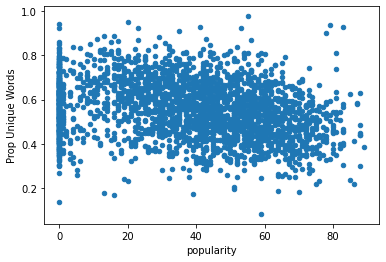

In [101]:
#Q11: What is the relationship between popularity and Prop Unique Words? Answer using a plot.

df.plot.scatter(x='popularity', y='Prop Unique Words')



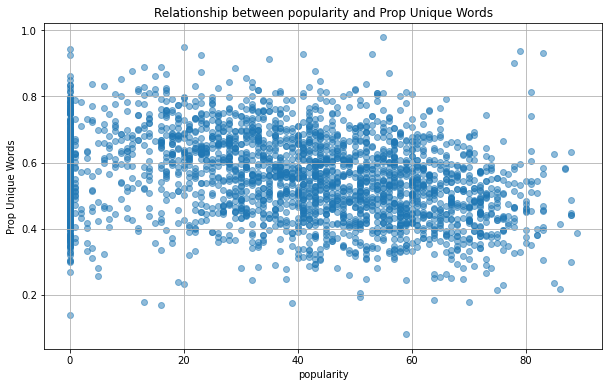

In [102]:
#Q12: What is the relationship between energy and tempo of a song? Answer using a matplotlib scatter plot.

    
# Create the scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(popularity, prop_unique_words, alpha=0.5)
plt.title("Relationship between popularity and Prop Unique Words")
plt.xlabel("popularity")
plt.ylabel("Prop Unique Words")
plt.grid(True)
plt.show()


In [103]:
# What is the relationship between popularity and prop unique words when 
# songs with popularity of 20 or less are removed?

# First remove rows where popularity is 20 or less.
df = df[df["popularity"] > 20]

df




,popularity,Prop Unique Words
0,68,0.562399
1,52,0.428270
2,39,0.538462
3,66,0.551532
4,62,0.584810
...,...,...
2580,68,0.546269
2581,86,0.413655
2582,59,0.530752
2583,81,0.454106


<AxesSubplot:xlabel='popularity', ylabel='Prop Unique Words'>

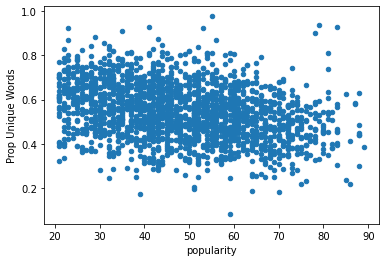

In [104]:
# Then make the plot with the cleaned df.
df.plot.scatter(x='popularity', y='Prop Unique Words')



In [105]:
# Create a dataframe of the inverse of popularity and Prop Unique Words.

# Step 1: Calculate the inverse of the "Popularity" column
# Using np.where to handle division by zero
df["Inverse Popularity"] = np.where(df["popularity"] != 0, 1 / df["popularity"], np.nan)

# Step 2: Create a new DataFrame with the inverse popularity
df_inverse_popularity = df[["Inverse Popularity", "Prop Unique Words"]]

df_inverse_popularity


<ipython-input-105-8c33aee1602a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Inverse Popularity"] = np.where(df["popularity"] != 0, 1 / df["popularity"], np.nan)


,Inverse Popularity,Prop Unique Words
0,0.014706,0.562399
1,0.019231,0.428270
2,0.025641,0.538462
3,0.015152,0.551532
4,0.016129,0.584810
...,...,...
2580,0.014706,0.546269
2581,0.011628,0.413655
2582,0.016949,0.530752
2583,0.012346,0.454106


<AxesSubplot:xlabel='Inverse Popularity', ylabel='Prop Unique Words'>

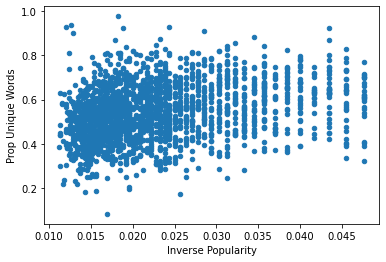

In [106]:
# Then make the plot with the new df.
df.plot.scatter(x='Inverse Popularity', y='Prop Unique Words')


In [142]:
# Create dataframes and plots of x vs y variables.

# Step 1: Prepare the data and make the dataframe.
x = []
y = []

for row in range(len(music_data)):
    if cell(row, "Word Count") < 1000:
        x.append(cell(row, "popularity"))
        y.append(cell(row, "Word Count"))

df = pd.DataFrame({
    "popularity": x,
    "Word Count": y
})

df


,popularity,Word Count
0,68,617.0
1,52,474.0
2,39,429.0
3,66,359.0
4,62,395.0
...,...,...
2484,68,335.0
2485,86,249.0
2486,59,439.0
2487,81,207.0


In [145]:
# Clean data in some way if desired.

df = df[df["popularity"] > 20]

df


,popularity,Word Count
0,68,617.0
1,52,474.0
2,39,429.0
3,66,359.0
4,62,395.0
...,...,...
2484,68,335.0
2485,86,249.0
2486,59,439.0
2487,81,207.0


<AxesSubplot:xlabel='popularity', ylabel='Word Count'>

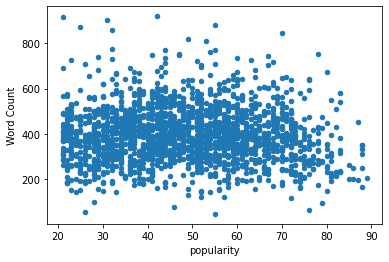

In [146]:
# Then make the scatterplot

df.plot.scatter(x='popularity', y='Word Count')



In [148]:
# Now if you want inverse of popularity.

# Step 1: Calculate the inverse of the "Popularity" column
# Using np.where to handle division by zero
df["Inverse Popularity"] = np.where(df["popularity"] != 0, 1 / df["popularity"], np.nan)

# Step 2: Create a new DataFrame with the inverse popularity
df_inverse_popularity = df[["Inverse Popularity", "Word Count"]]

df_inverse_popularity

<ipython-input-148-5d73c791bcfd>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Inverse Popularity"] = np.where(df["popularity"] != 0, 1 / df["popularity"], np.nan)


,Inverse Popularity,Word Count
0,0.014706,617.0
1,0.019231,474.0
2,0.025641,429.0
3,0.015152,359.0
4,0.016129,395.0
...,...,...
2484,0.014706,335.0
2485,0.011628,249.0
2486,0.016949,439.0
2487,0.012346,207.0


<AxesSubplot:xlabel='Inverse Popularity', ylabel='Word Count'>

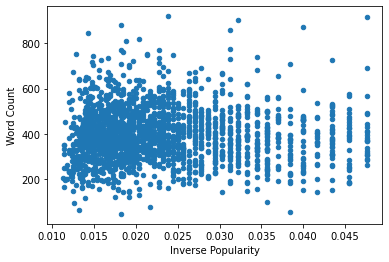

In [149]:
# Then make the scatterplot with inverse popularity

df.plot.scatter(x='Inverse Popularity', y='Word Count')



In [162]:
# Let me try to see if there are any second order interactions.

def second_order_relationships_excluding_popularity():
    results = {}
    popularity_idx = header.index('popularity')
    
    for i, col_name1 in enumerate(header[4:], start=4):
        for j, col_name2 in enumerate(header[4:], start=4):
            if col_name1 != 'popularity' and col_name2 != 'popularity' and col_name1 != col_name2:
                col_idx1 = header.index(col_name1)
                col_idx2 = header.index(col_name2)
                
                # Calculate the interaction between the two variables (product of the two columns)
                interactions = [
                    music_data[row_idx][col_idx1] * music_data[row_idx][col_idx2]
                    for row_idx in range(len(music_data))
                    if music_data[row_idx][col_idx1] is not None and music_data[row_idx][col_idx2] is not None
                ]
                
                # Corresponding popularity values
                popularity_vals = [
                    music_data[row_idx][popularity_idx]
                    for row_idx in range(len(music_data))
                    if music_data[row_idx][col_idx1] is not None and music_data[row_idx][col_idx2] is not None
                ]
                
                # Calculate the correlation coefficient between the interaction and popularity
                if len(interactions) > 0:
                    corr = np.corrcoef(interactions, popularity_vals)[0, 1]
                    results[(col_name1, col_name2)] = corr
    
    return results


In [163]:
# Calculate the second-order relationships excluding direct popularity relationships
relationships = second_order_relationships_excluding_popularity()

relationships


{('danceability', 'energy'): -0.03785309050820857,
 ('danceability', 'key'): 0.03503599289792748,
 ('danceability', 'loudness'): -0.02803515924726853,
 ('danceability', 'mode'): -0.01002343563996147,
 ('danceability', 'speechiness'): -0.09436271790887762,
 ('danceability', 'instrumentalness'): 0.024744865518264218,
 ('danceability', 'liveness'): -0.031376391720665475,
 ('danceability', 'valence'): -0.030442058220547453,
 ('danceability', 'tempo'): 0.11473752046153206,
 ('danceability', 'duration_ms'): 0.03098049889803235,
 ('danceability', 'time_signature'): 0.11692355129288036,
 ('danceability', 'Year'): 0.12777740890696646,
 ('danceability', 'Word Count'): -0.015597761340667276,
 ('danceability', 'Prop Unique Words'): -0.1219636216376068,
 ('danceability', 'Avg Sentiment'): 0.01544814031596752,
 ('danceability', 'Prop Lines Pos'): 0.07457666058922037,
 ('danceability', 'Prop Lines Neu'): 0.0647381037367674,
 ('danceability', 'Prop Lines Neg'): 0.02419706335163144,
 ('energy', 'dancea

In [164]:
# Sort and display the top 10 second-order relationships by absolute correlation value
sorted_relationships = sorted(relationships.items(), key=lambda x: abs(x[1]), reverse=True)

print("Top 10 second-order relationships (excluding direct popularity) with popularity:")
for pair, corr in sorted_relationships[:10]:
    print(f"Interaction between {pair[0]} and {pair[1]}: Correlation with popularity = {corr:.2f}")



Top 10 second-order relationships (excluding direct popularity) with popularity:
Interaction between energy and Prop Unique Words: Correlation with popularity = -0.28
Interaction between Prop Unique Words and energy: Correlation with popularity = -0.28
Interaction between Year and Prop Unique Words: Correlation with popularity = -0.26
Interaction between Prop Unique Words and Year: Correlation with popularity = -0.26
Interaction between time_signature and Prop Unique Words: Correlation with popularity = -0.25
Interaction between Prop Unique Words and time_signature: Correlation with popularity = -0.25
Interaction between speechiness and Prop Unique Words: Correlation with popularity = -0.22
Interaction between Prop Unique Words and speechiness: Correlation with popularity = -0.22
Interaction between duration_ms and Prop Unique Words: Correlation with popularity = -0.21
Interaction between Prop Unique Words and duration_ms: Correlation with popularity = -0.21


In [183]:
# Step 1: Prepare the data and make the dataframe
x = []
y = []

for row in range(len(music_data)):
    # Assuming 'energy' and 'Prop Unique Words' should be multiplied
    energy = cell(row, "energy")
    prop_unique_words = cell(row, "Prop Unique Words")

    # Ensure that both variables have valid (non-None) values
    if energy is not None and prop_unique_words is not None:
        # Append popularity to x
        x.append(cell(row, "popularity"))
        
        # Append the product of energy and Prop Unique Words to y
        interaction_value = energy * prop_unique_words
        y.append(interaction_value)

# Step 2: Create the DataFrame
df = pd.DataFrame({
    "popularity": x,
    "energy * Prop Unique Words": y
})

# Display the DataFrame
df


,popularity,energy * Prop Unique Words
0,68,0.377932
1,52,0.179017
2,39,0.342462
3,66,0.440123
4,62,0.350886
...,...,...
2580,68,0.327215
2581,86,0.248606
2582,59,0.373649
2583,81,0.177556


In [184]:
# Clean data in some way if desired.

df = df[df["popularity"] > 20]

df


,popularity,energy * Prop Unique Words
0,68,0.377932
1,52,0.179017
2,39,0.342462
3,66,0.440123
4,62,0.350886
...,...,...
2580,68,0.327215
2581,86,0.248606
2582,59,0.373649
2583,81,0.177556


<AxesSubplot:xlabel='popularity', ylabel='energy * Prop Unique Words'>

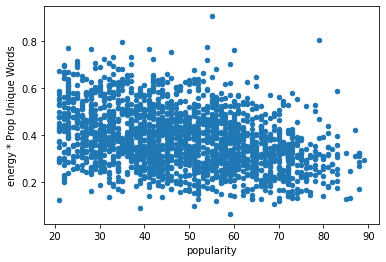

In [185]:
# Then make the scatterplot

df.plot.scatter(x='popularity', y='energy * Prop Unique Words')


In [186]:
# Now if you want inverse of popularity.

# Step 1: Calculate the inverse of the "Popularity" column
# Using np.where to handle division by zero
df["Inverse Popularity"] = np.where(df["popularity"] != 0, 1 / df["popularity"], np.nan)

# Step 2: Create a new DataFrame with the inverse popularity
df_inverse_popularity = df[["Inverse Popularity", "energy * Prop Unique Words"]]

df_inverse_popularity


<ipython-input-186-a2a2cf2831ab>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["Inverse Popularity"] = np.where(df["popularity"] != 0, 1 / df["popularity"], np.nan)


,Inverse Popularity,energy * Prop Unique Words
0,0.014706,0.377932
1,0.019231,0.179017
2,0.025641,0.342462
3,0.015152,0.440123
4,0.016129,0.350886
...,...,...
2580,0.014706,0.327215
2581,0.011628,0.248606
2582,0.016949,0.373649
2583,0.012346,0.177556


<AxesSubplot:xlabel='Inverse Popularity', ylabel='energy * Prop Unique Words'>

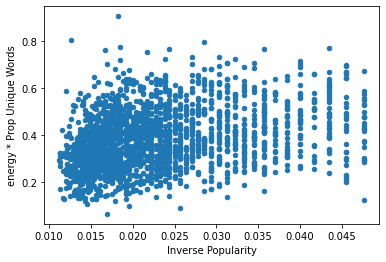

In [187]:
# Then make the scatterplot with inverse popularity

df.plot.scatter(x='Inverse Popularity', y='energy * Prop Unique Words')



<ipython-input-188-7d04ea05e615>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["1"] = 1
<ipython-input-188-7d04ea05e615>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["fit"] = df["Inverse Popularity"] * m + n


<AxesSubplot:xlabel='Inverse Popularity', ylabel='energy * Prop Unique Words'>

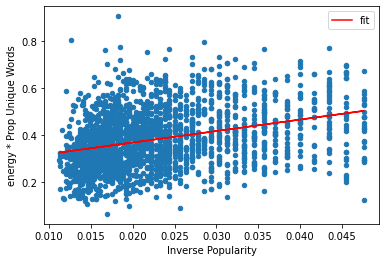

In [188]:
# Fit a y = m * x + n line to the scatter plot using the least-squares method; what are the coefficients m and n?


df["1"] = 1

res = np.linalg.lstsq(df[["Inverse Popularity", "1"]], df["energy * Prop Unique Words"], rcond=None)

# res is a tuple: (COEFFICIENTS, VALUE, VALUE, VALUE)
coefficients = res[0] # coefficients is (m,n:
m = coefficients[0] # slope
n = coefficients[1] # intercept
ax = df.plot.scatter(x='Inverse Popularity', y='energy * Prop Unique Words')

df["fit"] = df["Inverse Popularity"] * m + n
df.plot.line(x='Inverse Popularity', y='fit', c='red', ax=ax)